## **Problem Statement:**

- This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes.
- The company wants to know:
  - Which variables are significant in predicting the demand for shared bikes.
  - How well those variables describe the bike demands



In [1]:
# Import libraries:

import numpy as np
import pandas as pd
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data:

df = pd.read_csv("/content/drive/MyDrive/EPG - AI and ML/Course 2: Machine Learning-I/Linear Regression/Multiple Linear Regressionusing Python/dataset/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Shape of the data:
df.shape

(730, 16)

In [4]:
# Checking information related to the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Bike dataset description:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Dropping instant: Index of the dataset
#              dteday: Date which is given in the dataset in terms of weekday, month and year
#              casual, registered: Already included in the cnt column

df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)
df.shape

(730, 12)

In [7]:
# Converting the numeric labelled to categorical labelled columns:

df[['season']] = df[['season']].apply(lambda x: x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))
df[['mnth']] = df[['mnth']].apply(lambda x: x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                                                7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}))
df[['weekday']] = df[['weekday']].apply(lambda x: x.map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday',
                                       4:'Thursday', 5:'Friday', 6:'Saturday'}))
df[['weathersit']] = df[['weathersit']].apply(lambda x: x.map({1: 'clear', 2:'moderate', 3:'high', 4:'veryhigh'}))

In [8]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


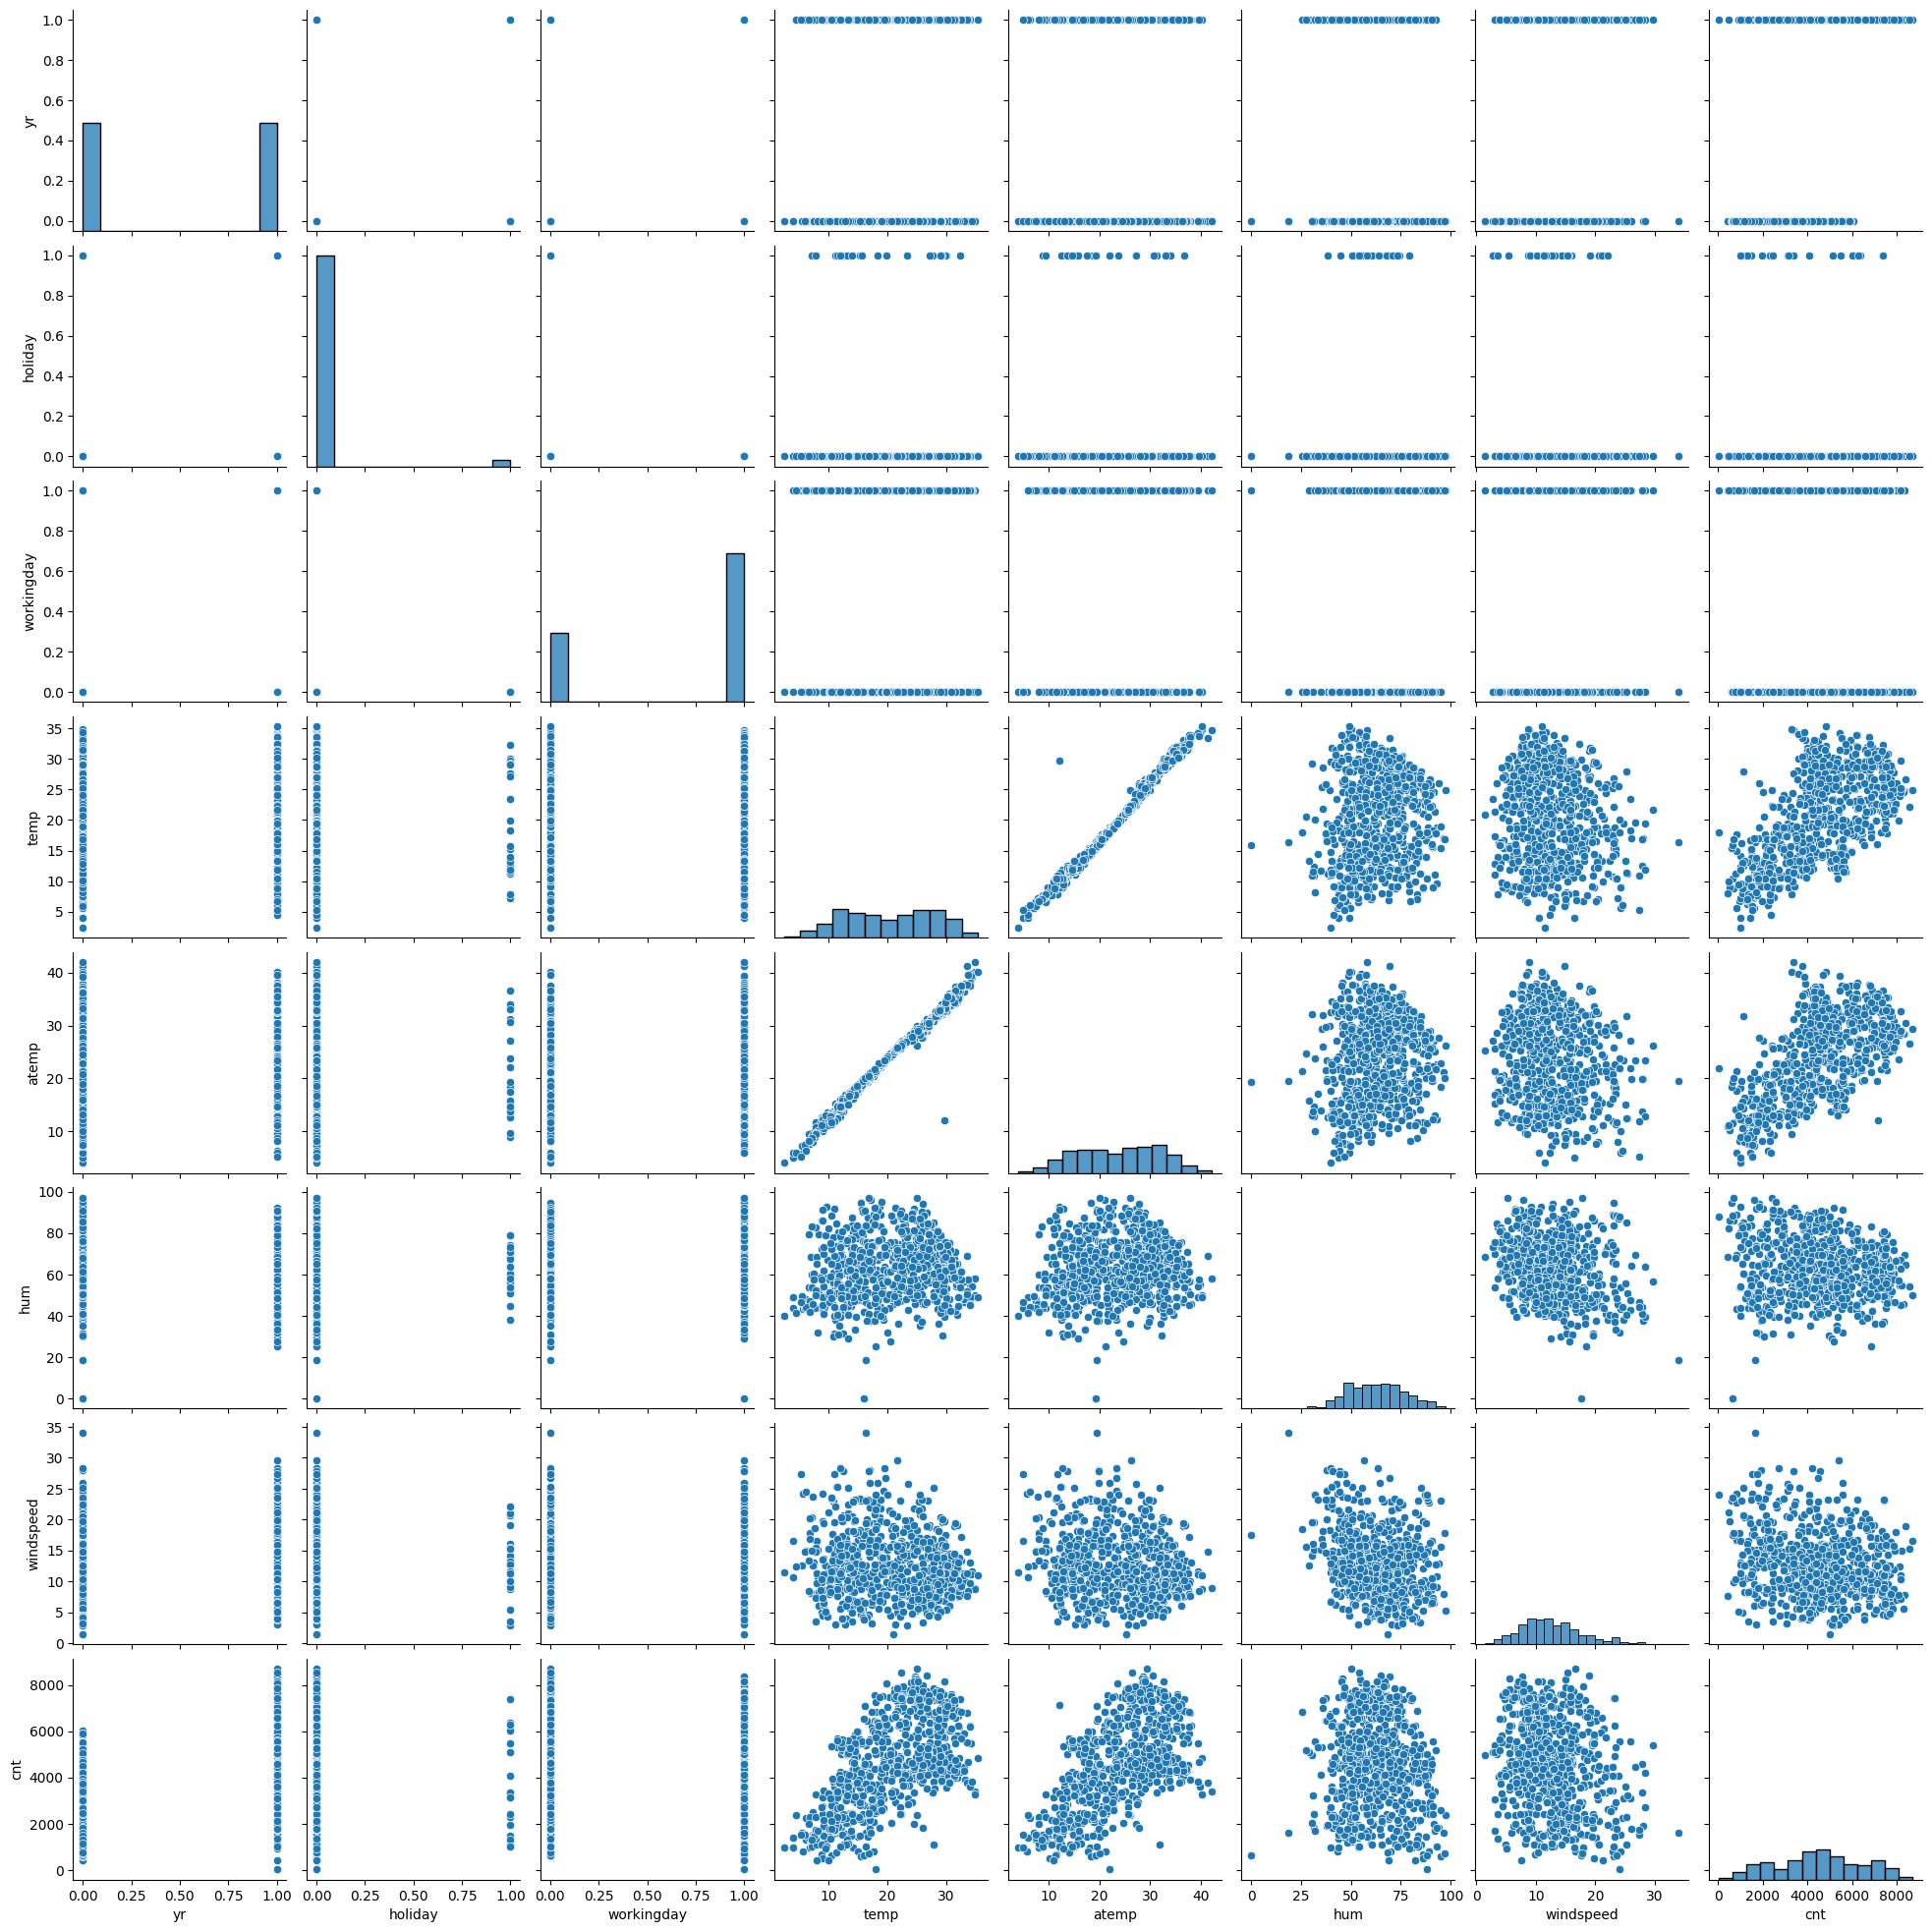

In [9]:
# Visualising the numerical variables:

sns.pairplot(df)
plt.show()

Observation:
- atemp and temp are highly correlated as they have straight linear relationship.
- temp and cnt, atemp and cnt also have a good linear reationship.

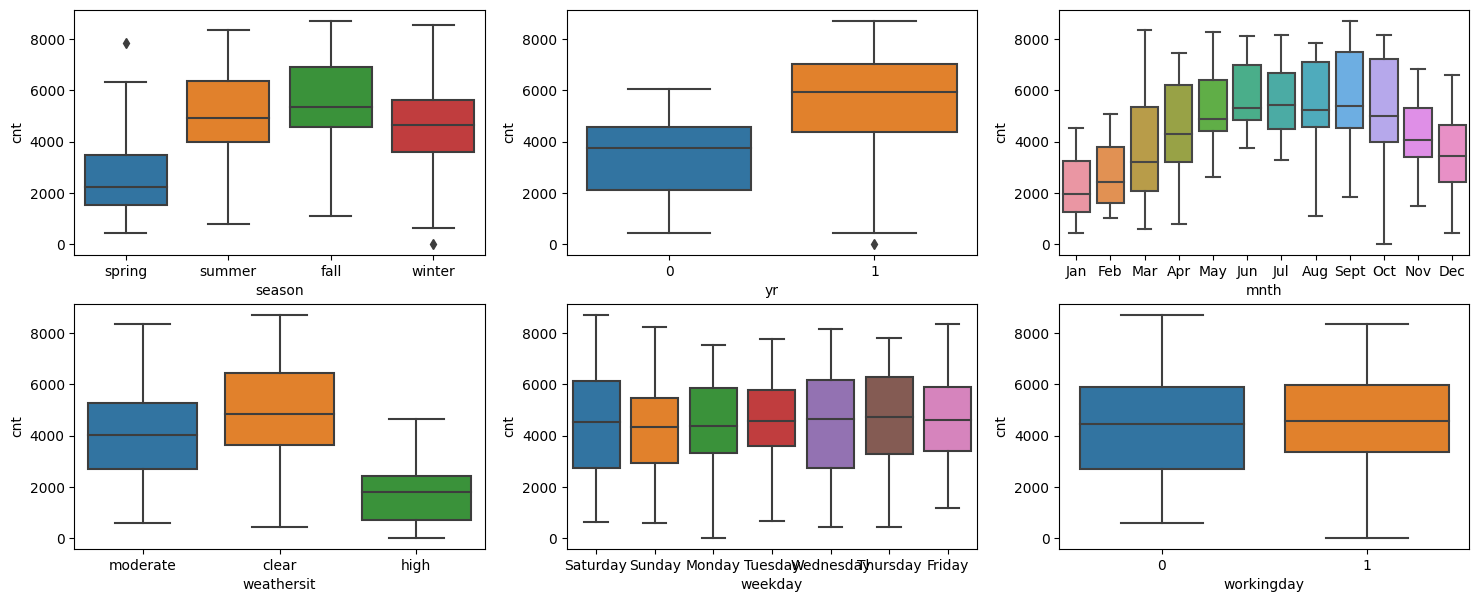

In [10]:
# Visualising categorical variables:

plt.figure(figsize=(18,7))
plt.subplot(2,3,1)
sns.boxplot(x='season',  y='cnt', data=df)
plt.subplot(2,3,2)
sns.boxplot(x='yr',  y='cnt', data=df)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth',  y='cnt', data=df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit',  y='cnt', data=df)
plt.subplot(2,3,5)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=df)

plt.show()

Observation:
- Fall season has high count of rentals.
- June to September have high rental counts.
- Working day i.e Wednesday, Thursday and weathersit is clear have high count of rentals

In [11]:
# Creating dummy variables and concatinating them with bike dataset:

df = pd.get_dummies(data=df, columns=['season'], drop_first=True)
df = pd.get_dummies(data=df, columns=["mnth"], drop_first=True)
df = pd.get_dummies(data=df, columns=["weekday"], drop_first=True)
df = pd.get_dummies(data=df, columns=["weathersit"])

In [12]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_clear,weathersit_high,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,1,0,0


In [13]:
# Shape of Bike dataset including dummy variables have 31 columns:
df.shape

(730, 31)

## **Train - Test split:**

In [14]:
# Import train_test_split from sklearn:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test set:
bike_df_train, bike_df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### **Rescaling** :

In [15]:
# Import MinMaxScaler for variable rescaling:
from  sklearn.preprocessing import MinMaxScaler

# List of numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Instantiate an MinMaxScaler object:
scaler = MinMaxScaler()

# Fit the scaler on data:
bike_df_train[num_vars] = scaler.fit_transform(bike_df_train[num_vars])
bike_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_clear,weathersit_high,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,1,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,0,0,0,0,1


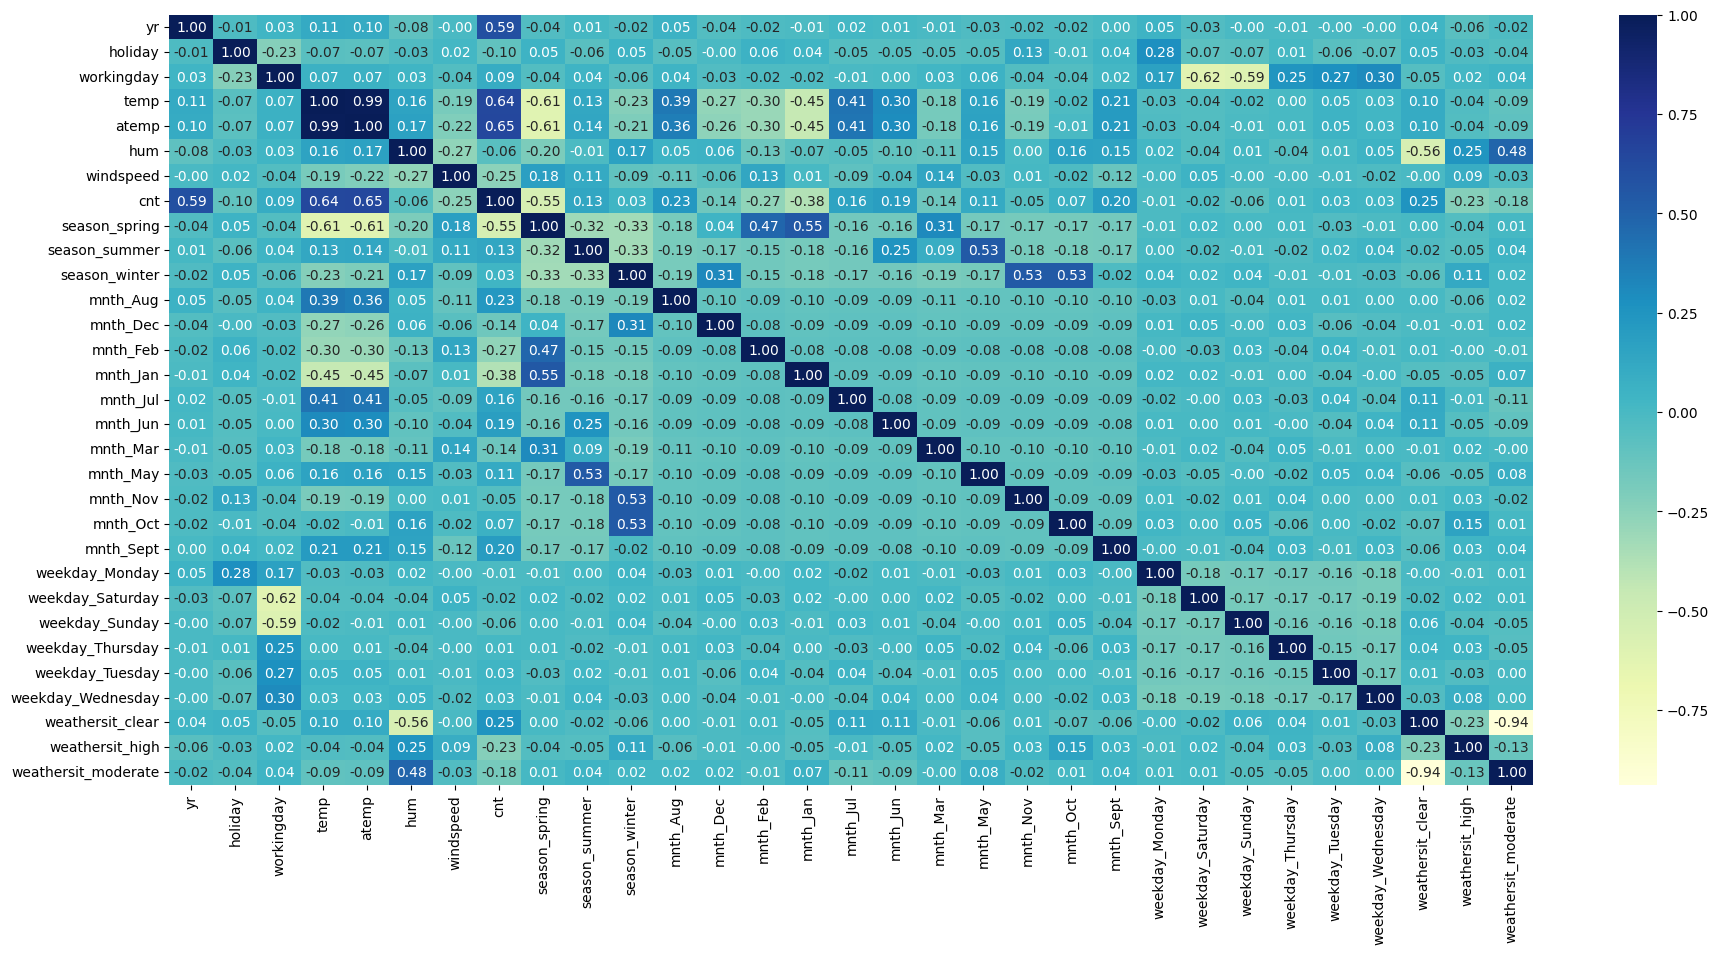

In [16]:
# Checking the correlation between the variables using Heatmap:

plt.figure(figsize=(22, 10))
sns.heatmap(bike_df_train.corr(), annot=True, fmt='.2f' ,cmap='YlGnBu')
plt.show()

In [17]:
# Splitting the bike_train dataset into X_train and y_train:
from sklearn.model_selection import train_test_split

y_train = bike_df_train.pop('cnt')
X_train = bike_df_train

### **Recursive Feature Elimination(RFE)**:

In [18]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [19]:
# Fitting Linear Regression model on X_train and y_train:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Running RFE with the number of features to 15
rfe = RFE(estimator=lr,  n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [20]:
# List with rfe support of features:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 8),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', False, 12),
 ('mnth_Sept', True, 1),
 ('weekday_Monday', False, 10),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 13),
 ('weekday_Tuesday', False, 11),
 ('weekday_Wednesday', False, 14),
 ('weathersit_clear', True, 1),
 ('weathersit_high', True, 1),
 ('weathersit_moderate', True, 1)]

In [21]:
# Adding columns with rfe support =True:

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Jul', 'mnth_Sept',
       'weekday_Saturday', 'weekday_Sunday', 'weathersit_clear',
       'weathersit_high', 'weathersit_moderate'],
      dtype='object')

In [22]:
# Eliminating or removing columns with rfe support = False:

X_train.columns[~rfe.support_]

Index(['atemp', 'season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Monday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

### **Building model using `statsmodel`:**



In [23]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [24]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### **Model 1:**

In [25]:
# Adding a constant variable:
X_train_rfe = sm.add_constant(X_train_rfe)

# Fitting the linear model:
lrm = sm.OLS(y_train,X_train_rfe)
lrm_model =lrm.fit()

#Summary of linear model
print(lrm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Thu, 21 Dec 2023   Prob (F-statistic):          3.81e-190
Time:                        05:46:50   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1255    

In [26]:
# Vif of model features:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
11,weekday_Saturday,inf
12,weekday_Sunday,inf
13,weathersit_clear,inf
14,weathersit_high,inf
15,weathersit_moderate,inf
4,temp,2.99
7,season_spring,2.55
5,hum,1.89


#### **Model 2:**

In [27]:
# Dropping the holiday column as it has high pvalue and VIF:
X_train_rfe1 = X_train_rfe.drop(["holiday"], axis = 1)

# Adding constant:
X_train_lm1 = sm.add_constant(X_train_rfe1)

# Fitting the linear regression model:
lrm1 = sm.OLS(y_train,X_train_lm1).fit()

In [28]:
# Summary of linear reg model:

print(lrm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Thu, 21 Dec 2023   Prob (F-statistic):          3.81e-190
Time:                        05:46:50   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0971    

In [29]:
# VIF values of model features:

vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,weathersit_clear,inf
13,weathersit_high,inf
14,weathersit_moderate,inf
2,workingday,9.07
10,weekday_Saturday,6.06
11,weekday_Sunday,5.74
3,temp,2.99
6,season_spring,2.55
4,hum,1.89
7,season_winter,1.78


#### **Model 3:**



In [30]:
# Dropping the weathersit column as it infinite VIF:
X_train_rfe2 = X_train_rfe1.drop(["weathersit_clear"], axis = 1)

# Adding constant:
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Fitting the linear reg model
lrm2 = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model

In [31]:
# Summary of linear model
print(lrm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Thu, 21 Dec 2023   Prob (F-statistic):          3.81e-190
Time:                        05:46:50   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2331    

In [32]:
# VIF of model features:

vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,99.67
2,workingday,9.07
10,weekday_Saturday,6.06
11,weekday_Sunday,5.74
3,temp,2.99
6,season_spring,2.55
4,hum,1.89
7,season_winter,1.78
13,weathersit_moderate,1.57
8,mnth_Jul,1.30


#### **Model 4:**



In [33]:
# Dropping 'const' variable, it has high VIF:
X_train_rfe3 = X_train_rfe2.drop(["const"], axis = 1)

# Adding constant:
X_train_lm3 = sm.add_constant(X_train_rfe3)

# Fitting linear reg model:
lrm3 = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model

In [34]:
# Summary of linear reg model:
print(lrm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Thu, 21 Dec 2023   Prob (F-statistic):          3.81e-190
Time:                        05:46:50   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2331    

In [35]:
# VIF values of model features:

vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.19
2,temp,17.24
1,workingday,16.92
9,weekday_Saturday,4.57
4,windspeed,4.52
10,weekday_Sunday,4.45
5,season_spring,2.79
12,weathersit_moderate,2.27
6,season_winter,2.15
0,yr,2.08


#### **Model 5:**

In [36]:
# Dropping 'hum', it is having VIF values:
X_train_rfe4 = X_train_rfe3.drop(["hum"], axis = 1)

# Adding constant:
X_train_lm4 = sm.add_constant(X_train_rfe4)

# Fitting linear reg model
lrm4 = sm.OLS(y_train,X_train_lm4).fit()

In [37]:
# Summary of linear model
print(lrm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.3
Date:                Thu, 21 Dec 2023   Prob (F-statistic):          4.38e-188
Time:                        05:46:50   Log-Likelihood:                 503.75
No. Observations:                 510   AIC:                            -981.5
Df Residuals:                     497   BIC:                            -926.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1536    

In [38]:
# VIF values of Linear reg model:

vif = pd.DataFrame()
X = X_train_rfe4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,13.12
2,temp,12.38
3,windspeed,4.48
8,weekday_Saturday,3.76
9,weekday_Sunday,3.53
4,season_spring,2.44
0,yr,2.07
5,season_winter,1.78
11,weathersit_moderate,1.57
6,mnth_Jul,1.37


#### **Model 6: (Final Model)**

In [39]:
# Dropping weekday_Sunday as it has high p-value:
X_train_rfe5 = X_train_rfe4.drop(["weekday_Sunday"], axis = 1)

# Adding constant
X_train_lm5 = sm.add_constant(X_train_rfe5)

# Fitting linear reg model:
lrm5 = sm.OLS(y_train,X_train_lm5).fit()   # Running the linear model

In [40]:
# Summary of linear model
print(lrm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     232.9
Date:                Thu, 21 Dec 2023   Prob (F-statistic):          2.53e-188
Time:                        05:46:50   Log-Likelihood:                 501.49
No. Observations:                 510   AIC:                            -979.0
Df Residuals:                     498   BIC:                            -928.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2038    

In [41]:
# VIF values oflinear reg model:

vif = pd.DataFrame()
X = X_train_rfe5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.54
1,workingday,4.47
3,windspeed,4.11
0,yr,2.06
4,season_spring,1.81
8,weekday_Saturday,1.79
10,weathersit_moderate,1.54
5,season_winter,1.45
6,mnth_Jul,1.36
7,mnth_Sept,1.20


## Residual Analysis:

In [42]:
# Using the final linear reg model to predict data from X_train_lm5 dataframe:
y_train_cnt = lrm5.predict(X_train_lm5)

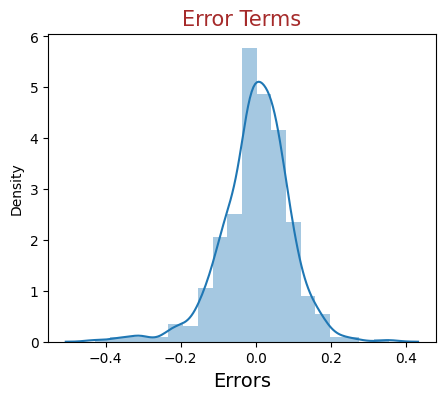

In [43]:
# Residual Analysis using Histogram:

fig = plt.figure(figsize=(5,4))
sns.distplot((y_train - y_train_cnt), bins = 20)
plt.xlabel('Errors', fontsize = 14)
plt.title("Error Terms", fontsize=15, color='brown')

plt.show()

## **Making Predictions:**




In [44]:
# ResScaling on test set:

# List of numerical variables:
num_vars = ['temp', 'atemp','hum','windspeed', 'cnt']

# Fitting a scaler on test set[num_vars]:
bike_df_test[num_vars] = scaler.transform(bike_df_test[num_vars])

In [45]:
# Splitting test set into X_test and y_test:

y_test = bike_df_test.pop('cnt')
X_test = bike_df_test

In [46]:
# Adding the columns which were used to train the final model:
X_test_new = X_test[X_train_rfe5.columns]

# Adding constant:
X_test_new = sm.add_constant(X_test_new)

In [47]:
# X_test information:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                219 non-null    float64
 1   yr                   219 non-null    int64  
 2   workingday           219 non-null    int64  
 3   temp                 219 non-null    float64
 4   windspeed            219 non-null    float64
 5   season_spring        219 non-null    uint8  
 6   season_winter        219 non-null    uint8  
 7   mnth_Jul             219 non-null    uint8  
 8   mnth_Sept            219 non-null    uint8  
 9   weekday_Saturday     219 non-null    uint8  
 10  weathersit_high      219 non-null    uint8  
 11  weathersit_moderate  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [48]:
# Making predictions on X_test_new:
y_pred = lrm5.predict(X_test_new)

## **Model Evaluation:**

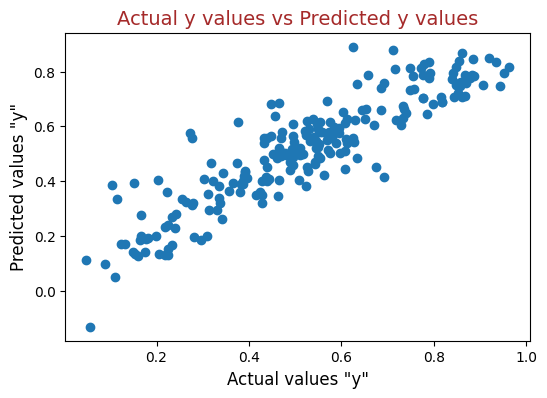

In [49]:
# Creating a scatter plot:

plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred)

plt.title('Actual y values vs Predicted y values', fontsize=14, color='brown')
plt.xlabel('Actual values "y"', fontsize=12)
plt.ylabel('Predicted values "y"', fontsize=12)

plt.show()

In [50]:
# VIF values of model parameters:

vif_param = pd.DataFrame(lrm5.params)
vif_param.insert(0,'Variables',vif_param.index)
vif_param.rename(columns = {0:'Coefficient'},inplace = True)
vif_param['index'] = list(range(0,12))
vif_param.set_index('index',inplace = True)
vif_param.sort_values(by = 'Coefficient',ascending = False,inplace = True)
vif_param


,Variables,Coefficient
index,,
3,temp,0.450991
1,yr,0.234436
0,const,0.203763
9,weekday_Saturday,0.065883
2,workingday,0.054329
8,mnth_Sept,0.054164
6,season_winter,0.047970
7,mnth_Jul,-0.069941
11,weathersit_moderate,-0.082523


### **Conclusion:**
- The R-squared value of the Linear Regression model is 83.7%.
-The equation of best fit line,

 > $cnt = 0.2038 + temp*0.4509 + yr*	0.2344 + weekdaySaturday*0.0659+ workingday*0.0543 + monthSept*0.0542 + seasonWinter*0.0479 - monthJul*0.0699 - weathersitModerate*0.0825 - seasonSpring*0.1117 - windspeed*0.1415 - weathersit_high*0.2905$

- Temperature and year are the major driving factors to predict the count.

- The count of bike rentals decreases in July, Spring season and Weathersit is moderate or high.

- If the positive coefficent of the factor increases, the count of the rental also increases and if the negative coefficent of the factor increases, the count of the rental decreases.
